## About our data

Dataset 1: 
From the US Energy Information Administration (EIA). Info about current operable electric power plants in the US by energy source.

Dataset 2:
TIGER shapefiles from US Census Bureau depicting state boundaries.

In [1]:
# import libraries

import geopandas as gpd
import pandas as pd
import matplotlib as plt

# update pandas display option
pd.set_option("display.max.columns", None)

We want to make a geopandas geodataframe from our csv data.

In [8]:
# import csv data using pandas
power_plants = pd.read_csv('data/power_plants_epsg4269.csv')

In [9]:
power_plants.head()

,Unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,0.0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,1.0,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,2.0,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900
3,3.0,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889
4,4.0,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900


From the "documentation" we know that CRS for this file is EPSG:4269 in lat/lon coordinates. We can use this infor to create a new `gpd.GeoDataFrame` from the `pd.DataFrame`.
To do this we use the `gdp.points_from_xy`

In [12]:
power_plants = gpd.GeoDataFrame( power_plants, # data for geo-dataframe
                                # specifying a geometry column
                                geometry = gpd.points_from_xy(power_plants.longitude,
                                                             power_plants.latitude),
                                # specify CRS
                                crs = 'EPSG:4269'
                               )

In [14]:
# print CRS info
print('is geographic?', power_plants.crs.is_geographic)
print('is projected?', power_plants.crs.is_projected)
print('datum', power_plants.crs.datum)
# print()

is geographic? True
is projected? False
datum North American Datum 1983


In [80]:
states = gpd.read_file('data/tl_2022_us_state/tl_2022_us_state.shp')
states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [95]:
states.columns = states.columns.str.lower()


In [96]:
states.region.unique()

array(['3', '2', '1', '4', '9'], dtype=object)

In [97]:
# check column types
states.dtypes

region        object
division      object
statefp       object
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [98]:
# Update the datatypes of region, division and statefp to be int
states[['region', 'division', 'statefp']] = states[['region', 'division', 'statefp']].astype(dtype='int64', copy = False)

In [99]:
states.dtypes

region         int64
division       int64
statefp        int64
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [100]:
# Check the states dataframe CRS
print('is projected?', states.crs.is_projected)
print('is geographic?', states.crs.is_geographic)

is projected? False
is geographic? True


In [101]:
states.crs == power_plants.crs

True

<AxesSubplot:>

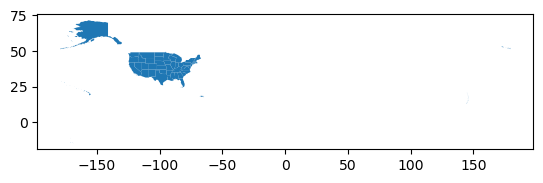

In [102]:
# make a graph

states.plot()

<AxesSubplot:>

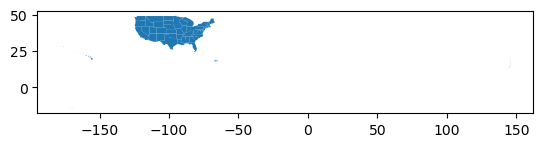

In [103]:
# excl. Alaska: statefp code = 2
states_excl_non_cont = states.loc[states.statefp != 2]

states_excl_non_cont.plot()

In [104]:
states_contiguous = states.loc[~states.stusps.isin(['HI','AK','VI','PR','GU','AS','MP'])]


<AxesSubplot:>

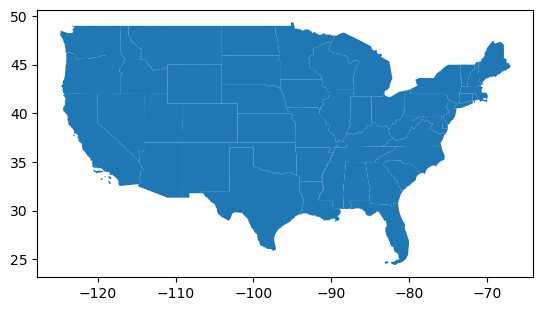

In [105]:
states_contiguous.plot()

In [106]:
states_contiguous2 = states.loc[states.region != 9]

<AxesSubplot:>

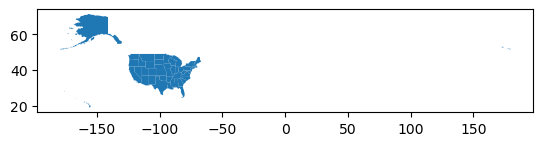

In [107]:
states_contiguous2.plot()

In [109]:
fig, ax = plt()

TypeError: 'module' object is not callable